**DATA EXPLORATION**

fluencybank_labels.csv is a dataset containing over 4k clips labeled with five event types including blocks, prolongations, sound repetitions, word repetitions, and interjections. Audio comes from public podcasts consisting of people who stutter interviewing other people who stutter.

**Source:** https://machinelearning.apple.com/research/stuttering-event-detection

**Dataset:** https://github.com/apple/ml-stuttering-events-dataset/

Each 3-second clip was annotated with the following labels by three annotators who were not clinicians but did have training on how to identify each type of stuttering event. Label files contain counts (out of three) corresponding to how many reviewers selected a given label. Multiple labels may be selected for a given clip.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/apple/ml-stuttering-events-dataset/main/fluencybank_labels.csv')
print(df.sample(10)) 

print(df.shape) #dataset dimensions

             Show  EpId  ClipId    Start     Stop  Unsure  PoorAudioQuality  \
747   FluencyBank    46      98  7368800  7416800       0                 0   
2597  FluencyBank   111     130  7451360  7499360       0                 0   
1503  FluencyBank    89      52  5284480  5332480       0                 0   
1900  FluencyBank    97     122   699840   747840       0                 0   
168   FluencyBank    16      68   504000   552000       0                 0   
1617  FluencyBank    93      27  2461920  2509920       0                 0   
1239  FluencyBank    81      71  3206240  3254240       0                 0   
3923  FluencyBank   230     153  9292160  9340160       0                 0   
2673  FluencyBank   118      41  8057120  8105120       0                 0   
3802  FluencyBank   230      32  1199200  1247200       0                 0   

      Prolongation  Block  SoundRep  WordRep  DifficultToUnderstand  \
747              0      0         0        0               

**Display columns in the dataset**

In [ ]:
for col in df.columns:
    print(col)

Show
EpId
ClipId
Start
Stop
Unsure
PoorAudioQuality
Prolongation
Block
SoundRep
WordRep
DifficultToUnderstand
Interjection
NoStutteredWords
NaturalPause
Music
NoSpeech


**Stuttering event labels:**

- **Prolongation:** Elongated syllable (e.g., M[mmm]ommy)

- **Block:** Gasps for air or stuttered pauses

- **Sound Repetition:** Repeated syllables (e.g., I [pr-pr-pr-]prepared dinner)

- **Word Repetition:** The same word or phrase is repeated (e.g., I made [made] dinner)

- **No Stuttered Words:** Confirmation that none of the above is true.

- **Interjection:** Common filler words such as "um" or "uh" or person-specific filler words that individuals use to cope with their stutter (e.g., some users frequently say "you know" as a filler).

**Additional labels:**

- **Unsure:** An annotator selects this if they are not confident in their labeling.

- **Poor Audio Quality:** It is difficult to understand due to, for example, microphone quality.

- **Difficult To Understand:** It is difficult to understand the speech.

- **Natural Pause:** There is a pause in speech that is not considered a block or other disfluency.

- **Music:** There is background music playing (only in SEP-28k)

- **No Speech:** There is no speech in this clip. It is either silent or there is just background noise.

The variable `NoStutteredWords` is the confirmation for annotators that 

`Prolongation` AND `Block` AND `Sound Repetition` AND `Word Repetition` = FALSE 

(i.e) no stuttered words

In [ ]:
print(df['NoStutteredWords'].value_counts())

3    1438
0    1270
2     804
1     632
Name: NoStutteredWords, dtype: int64


In [ ]:
check_df = df[['Prolongation', 'Block', 'SoundRep', 'WordRep', 'NoStutteredWords']]
check_df.sample(10)

,Prolongation,Block,SoundRep,WordRep,NoStutteredWords
3167,0,0,0,0,3
505,0,0,0,0,3
4026,0,1,0,3,0
1251,0,1,2,0,0
1686,0,0,0,0,3
766,0,0,0,0,3
252,0,1,0,0,2
3566,0,0,2,1,0
2212,0,1,2,0,0
1370,0,0,0,3,0


In [ ]:
print(check_df[(check_df['NoStutteredWords'] == 3)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
1                0      0         0        0                 3
5                0      0         0        0                 3
6                0      0         0        0                 3
8                0      0         0        0                 3
9                0      0         0        0                 3
...            ...    ...       ...      ...               ...
4125             0      0         0        0                 3
4126             0      0         0        0                 3
4129             0      0         0        0                 3
4135             0      0         0        0                 3
4143             0      0         0        0                 3

[1438 rows x 5 columns]


There are **1438** reliable data points of individuals who **did not stammer**.

In [ ]:
print(check_df[(check_df['NoStutteredWords'] == 0)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
4                0      0         0        3                 0
38               1      2         0        0                 0
75               0      3         0        1                 0
79               0      1         0        3                 0
82               0      1         1        2                 0
...            ...    ...       ...      ...               ...
4137             1      2         1        1                 0
4138             1      2         2        0                 0
4140             0      2         1        0                 0
4141             0      2         2        1                 0
4142             0      0         3        0                 0

[1270 rows x 5 columns]


There are **1270** reliable detection of individuals who displayed at least one characteristic of **stammering**.

In [ ]:
print(df['Unsure'].value_counts())

0    3935
1     194
2      13
3       2
Name: Unsure, dtype: int64


We will only keep the most reliable data points for further analysis.

**DATA WRANGLING**

In [ ]:
new_df = df.loc[(df['NoStutteredWords'] == 0) | (df['NoStutteredWords'] == 3)]
new_df.sample(10)

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech
3023,FluencyBank,147,35,4734720,4782720,1,0,0,1,0,1,1,0,0,1,0,0
132,FluencyBank,16,32,2974080,3022080,0,0,1,2,2,0,0,0,0,0,0,0
2528,FluencyBank,111,61,491840,539840,0,0,0,0,0,0,0,0,3,1,0,0
2993,FluencyBank,147,5,2305440,2353440,0,0,2,1,0,0,0,1,0,0,0,0
3178,FluencyBank,178,3,7266880,7314880,0,0,0,0,0,0,0,1,3,0,0,0
1144,FluencyBank,76,72,10931200,10979200,0,0,2,1,0,1,0,2,0,0,0,0
2863,FluencyBank,121,118,6727680,6775680,0,0,0,0,0,0,0,1,3,1,0,0
2638,FluencyBank,118,6,6728480,6776480,0,0,0,0,0,0,0,0,3,0,0,0
1530,FluencyBank,89,79,7007200,7055200,0,0,1,0,3,0,0,1,0,0,0,0
3720,FluencyBank,219,76,8299520,8347520,0,0,0,0,0,0,0,0,3,1,0,0


In [ ]:
print(new_df['NoStutteredWords'].value_counts())

3    1438
0    1270
Name: NoStutteredWords, dtype: int64


In [ ]:
print(new_df.shape) #dataset dimensions
#1438 (reliable no stuttering data points) + 1270 (reliable stuttering data points) = 2708

(2708, 17)


**Deleting unnecessary features**




`Show` feature:

In [ ]:
print(new_df['Show'].unique())

['FluencyBank']


We can delete this column as it does not hold any meaningful information.

In [ ]:
del new_df['Show']

`Music` feature:

In [ ]:
print(new_df['Music'].value_counts())

0    2708
Name: Music, dtype: int64


There are no entries in the dataset containing music and not speech. So, we can delete this column.

In [ ]:
del new_df['Music']

`NoSpeech` feature:

In [ ]:
print(new_df['NoSpeech'].value_counts())

0    2708
Name: NoSpeech, dtype: int64


All entries in this dataset contain speech. So, we can delete this column as well.

In [ ]:
del new_df['NoSpeech']

In [ ]:
new_df.sample(10)

,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
3812,230,42,1608160,1656160,0,0,0,0,0,0,0,0,3,1
3296,178,121,5027680,5075680,0,0,0,0,0,0,0,3,3,0
3720,219,76,8299520,8347520,0,0,0,0,0,0,0,0,3,1
1429,87,96,8722560,8770560,0,0,0,0,0,0,0,0,3,0
643,31,76,665440,713440,0,0,2,0,1,0,0,1,0,0
1580,89,129,10025120,10073120,0,0,0,0,0,3,0,0,0,1
3578,218,22,2200800,2248800,0,0,2,0,0,2,0,2,0,1
531,24,161,9252480,9300480,0,0,0,0,0,3,0,0,0,0
2594,111,127,7386880,7434880,0,0,0,0,0,0,0,0,3,0
1933,97,155,9248000,9296000,0,0,3,2,1,0,1,0,0,0


The features `Poor Audio Quality` (difficulty in understanding due to, for example, microphone quality) & `Difficult To Understand` (difficulty in understanding speech of the individual)

In [ ]:
print(new_df['PoorAudioQuality'].value_counts())

0    2708
Name: PoorAudioQuality, dtype: int64


All entries in this dataset contain good-quality audio data. So, we can delete this column as well.

In [ ]:
del new_df['PoorAudioQuality']

In [ ]:
new_df.sample(10)

,EpId,ClipId,Start,Stop,Unsure,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
2020,98,49,4981120,5029120,0,0,1,1,1,0,1,0,0
3593,218,37,183840,231840,0,0,0,0,0,0,0,3,0
3612,218,56,3743200,3791200,0,0,0,3,0,0,3,0,0
670,46,21,2415680,2463680,0,0,2,2,0,0,0,0,0
2688,118,56,8814880,8862880,0,1,2,0,0,0,0,0,0
1427,87,94,8640320,8688320,0,0,0,0,0,0,1,3,0
3640,218,84,731680,779680,0,0,0,0,0,0,2,3,0
1574,89,123,9630080,9678080,0,1,0,0,0,0,2,3,0
2803,121,58,3566560,3614560,0,0,2,1,1,0,0,0,0
1791,97,13,12429760,12477760,0,1,1,2,0,1,1,0,0


In [ ]:
print(new_df['DifficultToUnderstand'].value_counts())

0    2445
1     195
2      62
3       6
Name: DifficultToUnderstand, dtype: int64


In [ ]:
new_df.loc[(new_df['DifficultToUnderstand'] == 0) & (new_df['NoStutteredWords'] == 3)]

,EpId,ClipId,Start,Stop,Unsure,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
1,10,1,1271520,1319520,0,0,0,0,0,0,0,3,0
5,10,5,1919520,1967520,0,0,0,0,0,0,0,3,1
6,10,6,1982720,2030720,0,0,0,0,0,0,0,3,0
8,10,8,2047520,2095520,0,0,0,0,0,0,0,3,0
9,10,9,2070400,2118400,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,985,169,12085280,12133280,0,0,0,0,0,0,0,3,0
4125,985,177,1550880,1598880,0,0,0,0,0,0,0,3,0
4126,985,178,1602400,1650400,0,0,0,0,0,0,0,3,0
4135,985,187,13271840,13319840,0,0,0,0,0,0,0,3,0


We can now delete `DifficultToUnderstand` feature.

In [ ]:
del new_df['DifficultToUnderstand']

In [ ]:
print(new_df.sample(10))

      EpId  ClipId    Start     Stop  Unsure  Prolongation  Block  SoundRep  \
1447    87     114   987680  1035680       0             1      1         3   
2672   118      40  7997280  8045280       0             2      0         2   
1553    89     102  8022080  8070080       0             1      0         0   
1879    97     101  5754240  5802240       0             0      2         1   
901     63     125  8747520  8795520       1             0      2         0   
2490   111      23  1720320  1768320       1             0      2         0   
525     24     155  9086080  9134080       0             0      0         0   
421     24      51  2792640  2840640       0             0      0         0   
63      10      63  6858880  6906880       0             0      0         0   
2350   107      65  4980480  5028480       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
1447        0             2                 0             0  
2672  

`Unsure` feature:

In [ ]:
new_df['Unsure'].value_counts()

0    2622
1      82
2       3
3       1
Name: Unsure, dtype: int64

In [ ]:
new_df = new_df[new_df['Unsure'] == 0]
print(new_df.sample(10))
print(new_df.shape) #dataset dimensions

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
2696   118      64   9278880   9326880       0             2      1         0   
1711    96      28   3013280   3061280       0             0      1         3   
477     24     107   6015040   6063040       0             1      2         1   
666     46      17     92000    140000       0             0      0         0   
3716   219      72   7739360   7787360       0             0      0         3   
3595   218      39   2955360   3003360       0             0      0         0   
580     31      13   1823040   1871040       0             0      0         0   
1159    76      87  12969120  13017120       0             0      0         0   
2927   132      39   3868000   3916000       0             0      0         0   
2110    99      11  13030400  13078400       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
2696        0             0                 0 

We retain `EpId`, `ClipId`, `Start` & `Stop` features for referencing purposes.

Converting the value '3' in `NoStutteredWords` into 1: 

*(Purely for intuitive understanding)*

In [ ]:
new_df['NoStutteredWords'] = new_df['NoStutteredWords'].replace([3], 1)
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
1004    71      53   3294080   3342080       0             0      1         3   
3938   230     168  10178400  10226400       0             0      0         0   
1392    87      59   5829760   5877760       0             0      1         2   
49      10      49   5997600   6045600       0             0      0         0   
2480   111      13   1163680   1211680       0             0      0         0   
1949    97     171  10508480  10556480       0             0      1         2   
919     63     143  10204320  10252320       0             0      0         0   
1761    96      78   5765600   5813600       0             1      1         1   
413     24      43   2313600   2361600       0             0      0         0   
1862    97      84   4785600   4833600       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
1004        0             0                 0 

Let's create a new column `Stutter` that shows '1' is when stutter is detected & '0' when there is no stutter.

*(Purely for intuitive understanding)*

In [ ]:
import numpy as np
new_df['Stutter'] = np.where(new_df['NoStutteredWords'] == 1, 0, 1)

In [ ]:
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
1759    96      76   5568960   5616960       0             0      1         2   
938     63     162  11004800  11052800       0             0      0         0   
2539   111      72   4681600   4729600       0             0      0         0   
3739   219      95   9650080   9698080       0             0      0         0   
1130    76      58   1189280   1237280       0             0      1         2   
2358   107      73   5462720   5510720       0             0      0         0   
3379   179      33   3270080   3318080       0             0      0         0   
659     46      10   1412320   1460320       0             0      0         0   
2505   111      38   2279040   2327040       0             0      0         0   
3255   178      80   3072000   3120000       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  Stutter  
1759        3             0          

In [ ]:
final_df = new_df.filter(['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause','Stutter'], axis=1)
final_df['Prolongation'] = np.where(final_df['Prolongation'] != 0, 1, 0)
final_df['Block'] = np.where(final_df['Block'] != 0, 1, 0)
final_df['SoundRep'] = np.where(final_df['SoundRep'] != 0, 1, 0)
final_df['WordRep'] = np.where(final_df['WordRep'] != 0, 1, 0)
final_df['Interjection'] = np.where(final_df['Interjection'] != 0, 1, 0)
final_df['NaturalPause'] = np.where(final_df['NaturalPause'] != 0, 1, 0)

print(final_df.sample(10))
print(final_df.shape)

      Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause  \
288              0      1         1        1             1             1   
3513             0      1         1        0             1             0   
919              0      0         0        0             0             1   
2247             0      0         0        0             1             0   
2630             0      0         0        0             0             0   
1986             0      0         0        0             0             0   
1462             0      1         1        0             1             0   
2740             0      0         0        0             0             0   
1394             0      1         1        0             1             0   
854              0      0         0        0             0             0   

      Stutter  
288         1  
3513        1  
919         0  
2247        0  
2630        0  
1986        0  
1462        1  
2740        0  
1394        1  
854

**Correlation Heat Map:** finding correlation between `Stutter` and its independent variables: 

`Prolongation`, `Block`, `SoundRep`, `WordRep`, `Interjection`, `NaturalPause`.

<AxesSubplot:>

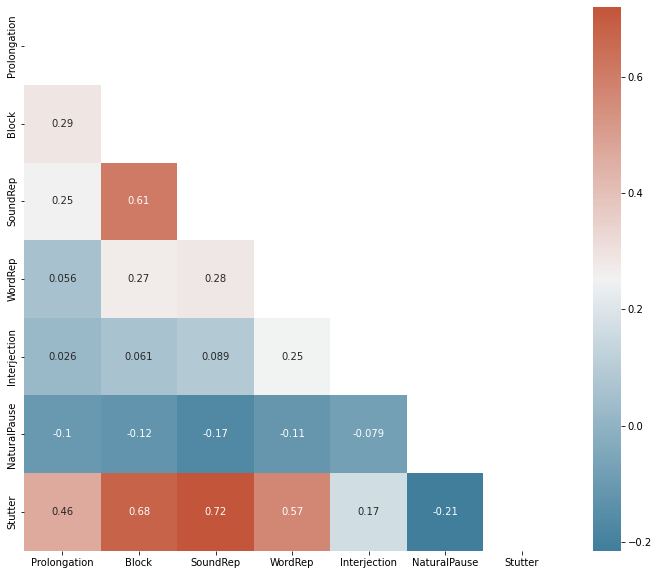

In [ ]:
final_df.columns = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause','Stutter']

# Correlation between different variables
corr = final_df.corr()

# Set up the matplotlib plot configuration
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

From the last 6 boxes in the heat map,

- We can see that the variables `Prolongation`, `Block`, `SoundRep` & `WordRep` are strongly correlated with `Stutter` which stores data on the correct labelling of stuttered words. 

- The variables `Interjection` & `NaturalPause` have little to negative correlation with `Stutter`.

**MACHINE LEARNING**

In [ ]:
feature_names = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause']
X = final_df[feature_names]
y = final_df['Stutter']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #70% train data & 30% test data

In [ ]:
print(X_train, X_test, y_train, y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

      Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause
869              0      0         0        0             0             0
1200             0      1         1        0             0             0
4070             0      0         0        0             0             0
2861             0      0         0        0             0             1
61               0      0         0        0             0             0
...            ...    ...       ...      ...           ...           ...
2741             0      0         0        0             0             0
1260             0      0         0        0             1             0
1386             0      0         1        1             1             0
2622             0      0         0        0             0             1
4124             1      0         0        1             0             0

[1835 rows x 6 columns]       Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause
3961             1      0 

Using, `LogisticRegression` as it is always advisable to use the simplest binary classification model and increase model complexity if better prediction models are required.

In [ ]:
feature_names = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause']
X = final_df[feature_names]
y = final_df['Stutter']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #70% train data & 30% test data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)

print('Accuracy of the model on test data: {:.2f}'.format(model_accuracy))

Accuracy of the model on test data: 0.99


**PREDICTING NEW TEST CASES...**

In [ ]:
new_data_point = [{'Prolongation': 1, 'Block': 0, 'SoundRep': 0, 'WordRep': 0, 'Interjection': 1, 'NaturalPause': 1}]
new_test_case = pd.DataFrame(new_data_point)
new_test_case

,Prolongation,Block,SoundRep,WordRep,Interjection,NaturalPause
0,1,0,0,0,1,1


In [ ]:
new_test_case_prediction = model.predict(new_test_case)
new_test_case_prediction[0]

1